In [11]:
import os
import gdown
import zipfile

def gdrive_download(file_id: str,out_dir: str):
  url = "https://drive.google.com/uc?id=" + file_id
  output = 'dataset.zip'
  gdown.download(url, output, quiet=False,fuzzy=True)
  with zipfile.ZipFile(output, 'r') as zip_ref:
      zip_ref.extractall(out_dir)

dataset_dir = "dataset"
gdrive_download(file_id="1xMG984Rvne3bqmFJjhcKoEMrbFxv3NPn", out_dir = dataset_dir)
DATA_PATH = os.path.join(dataset_dir,"data")

Downloading...
From: https://drive.google.com/uc?id=1xMG984Rvne3bqmFJjhcKoEMrbFxv3NPn
To: /content/dataset.zip
100%|██████████| 4.50M/4.50M [00:00<00:00, 256MB/s]


In [2]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plotter_lib

In [5]:
img_height, img_width= 46, 46

batch_size=16
train_ds = tflow.keras.preprocessing.image_dataset_from_directory(DATA_PATH, validation_split=0.2, subset="training", seed=123, label_mode='categorical', 
                                                                  image_size=(img_height, img_width),batch_size=batch_size)

Found 693 files belonging to 7 classes.
Using 555 files for training.


In [6]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(DATA_PATH, validation_split=0.2, subset="validation", seed=123, label_mode='categorical',
                                                                       image_size=(img_height, img_width), batch_size=batch_size)

Found 693 files belonging to 7 classes.
Using 138 files for validation.


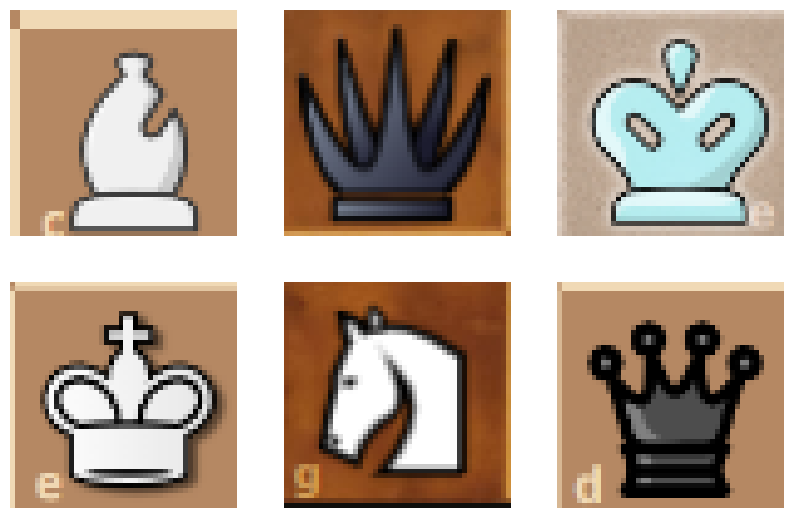

In [7]:
plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):
  for var in range(6):
    ax = plotter_lib.subplot(3, 3, var + 1)
    plotter_lib.imshow(images[var].numpy().astype("uint8"))
    plotter_lib.axis("off")

In [8]:
demo_resnet_model = Sequential()

pretrained_model_for_demo= tflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(46, 46, 3),
                   pooling='avg',classes=6,
                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:
        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

94765736/94765736 [==============================] - 5s 0us/step


In [9]:
demo_resnet_model.add(Flatten())
demo_resnet_model.add(Dense(512, activation='relu'))
demo_resnet_model.add(Dense(7, activation='softmax'))

demo_resnet_model.compile(optimizer = tflow.keras.optimizers.SGD(learning_rate=0.1), loss = 'binary_crossentropy', metrics = ['acc'])

In [10]:
demo_resnet_model.fit(train_ds, epochs=100, validation_data = validation_ds)

Epoch 1/100
35/35 [==============================] - 19s 106ms/step - loss: 0.4229 - acc: 0.5153 - val_loss: 0.2261 - val_acc: 0.6522
Epoch 2/100
35/35 [==============================] - 1s 17ms/step - loss: 0.1732 - acc: 0.7766 - val_loss: 0.2036 - val_acc: 0.7101
Epoch 3/100
35/35 [==============================] - 1s 40ms/step - loss: 0.1276 - acc: 0.8577 - val_loss: 0.2010 - val_acc: 0.7464
Epoch 4/100
35/35 [==============================] - 1s 20ms/step - loss: 0.1008 - acc: 0.9063 - val_loss: 0.1657 - val_acc: 0.7609
Epoch 5/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0875 - acc: 0.9189 - val_loss: 0.2004 - val_acc: 0.7246
Epoch 6/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0713 - acc: 0.9405 - val_loss: 0.1819 - val_acc: 0.7681
Epoch 7/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0582 - acc: 0.9532 - val_loss: 0.1742 - val_acc: 0.7826
Epoch 8/100
35/35 [==============================] - 1s 18ms/step - loss: 